# Dimensional analysis of muons

This document is about a dimensional analyais using PCA that was run on the muon hunters dataset. The goal of this project was to project the muon dataset into feature-space, and see if there is inherent structure to the data that can be picked up by a machine learning algorithm.

The amount of muons that have labels (where we are certain it is/isn't a muon) is extremely small. Out of 300,000 muons, only 100 are labeld as real. This means that any projection of the muon data into feature space would lack context, as it may be unclear if the real muons are clustering in the projection. To increase the number of definite labels, SWAP was run on the muon hunters classification data using the existing gold standard labels. This grew the number of labels from 100 real and 700 bogus to 2719 real and 29564 bogus.

In all of the following plots, the red dots are subjects that SWAP retired as real, the blue dots are subjects that SWAP retired as bogus, and the grey dots are subjects that SWAP did not retire.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import muon
import muon.scripts.clustering as scripts
import pickle
import math

cluster = pickle.load(open('mnt/cluster-all.pkl', 'rb'))

20171117_14:54:00 INFO Initialized logging


/home/michael/Documents/Zooniverse/repos/swap/conf
/home/michael/Documents/Zooniverse/repos/swap/tools/muon/muon_config.conf


20171117_14:54:01 INFO opening mongo connection


Database Handler initializing:
Host => localhost
DB => muon_hunters
Port => 27017


/home/michael/.virtualenv/muon/lib/python3.5/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator PCA from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In the following cell, on the left only a sample of the subjects are plotted, and on the right all the subjects are plotted. The subjects are plotted in order, such that the greys are on the bottom, then the blues, and the red appear on top. This appears to show that there is some clustering occuring. The negative space on the first principle component appears to be dominated by non-muons. The real muons appear to cluster around the x-axis between -2 and +2. Therefore one can speculate that a lot of the gray dots (unlabeled muons) in the vicinity of the red mass might be muon-like. 

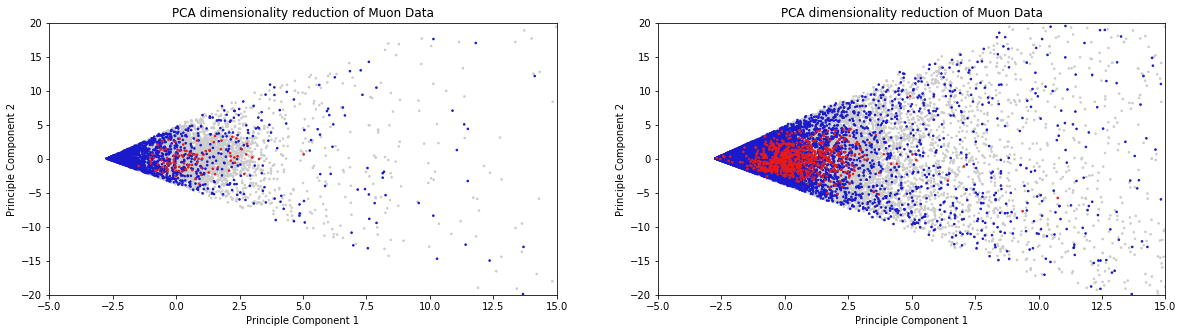

In [5]:
fig=plt.figure(figsize=(20,5))
cluster.plot(fig=fig, subplot=(1, 2, 1), show=False)
cluster.plot_all(fig=fig, subplot=(1, 2, 2), show=False)
plt.show()

Here the different classes are plotted separately. This emphasizes that the blue (non-muon) dots are highly concentrated in an area that is left of the bulk concentration of the red (muon) dots. The structure of the grey (unknown) dots appears to be a combination of the red and blue structures, which suggests that a significant chunk of the grey dots in the region occupied by the red dots could be real muons.

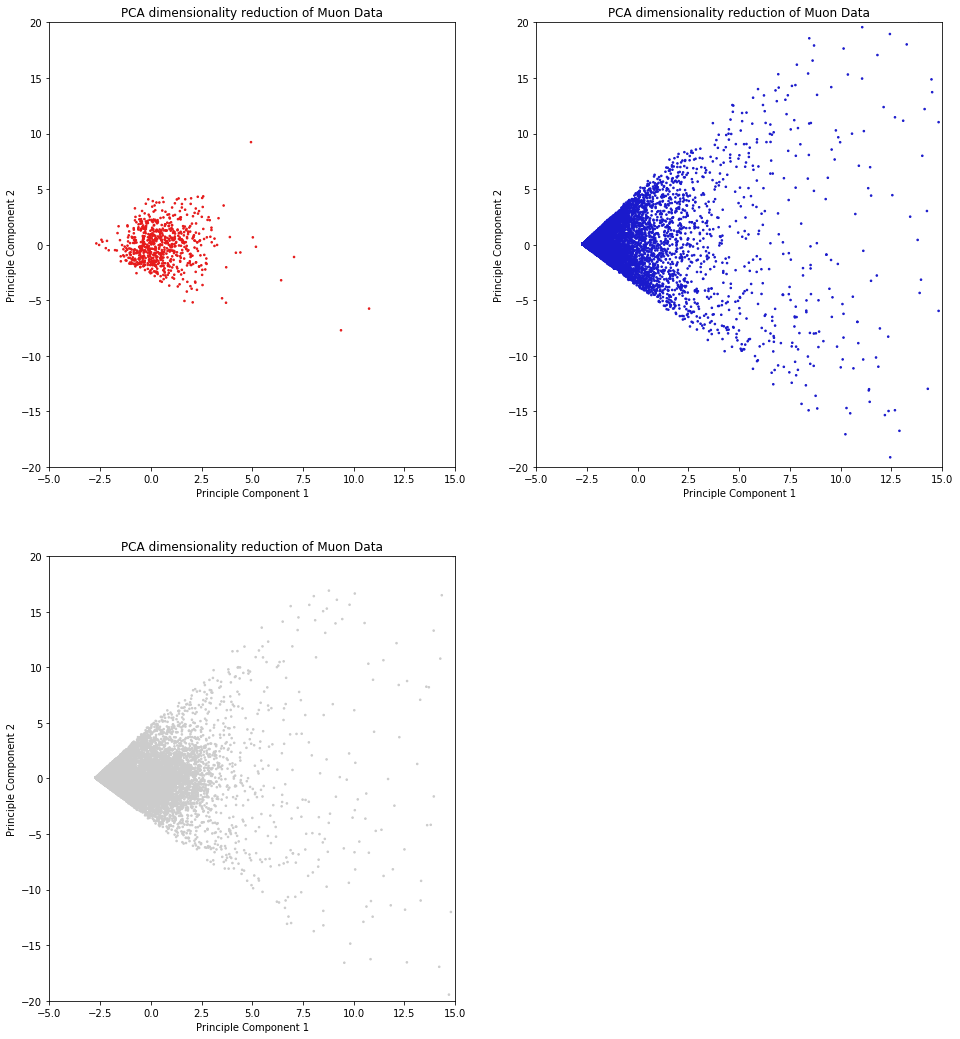

In [12]:
fig = plt.figure(figsize=(16, 18))
for i, s in enumerate((1, 0, -1)):
    cluster.plot_class(s, fig=fig, subplot=(2, 2, i+1), show=False)

plt.show()

The straight lines that appear in the dimensionality reduction plots are unusual. It suggests that the first two principle components are somehow coupled. The coupling might be due to the fact that nearby pixels usually light up together.

The principle components above don't explain very much of the variance in the feature space. The next cell shows that the first 20 principlel components combined only explain 60% of the variance. The first two components only account for 20% of variance. This might explain why there is so much overlap between the different classes, as these axes don't account for much of the variance.

Using 499 components
variance explained by all components:		1.000
variance explained by first two components:	0.196
Number of components to explain .99 variance:	388


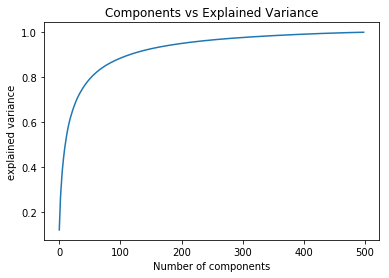

In [8]:
import numpy as np
v = cluster.pca.explained_variance_ratio_
print('Using %d components' % len(v))
# print('variance explained by each component:\n%s' % v)
print('variance explained by all components:\t\t%.3f' % np.sum(v))
print('variance explained by first two components:\t%.3f' % np.sum(v[:2]))

x = range(len(v))
y = []
current = 0
for i in v:
    current += i
    y.append(current)

for i, n in enumerate(y):
    if n > .99:
        print('Number of components to explain .99 variance:\t%d' % i)
        break
plt.plot(x, y)
plt.xlabel('Number of components')
plt.ylabel('explained variance')
plt.title('Components vs Explained Variance')
plt.show()

Below is a plot of each camera's average value across all the muon data. There are some dark pixels in the middle of some brighter pixels. This suggests that some of the cameras are not funtioning properly, and are either outputting noise or nothing at all.

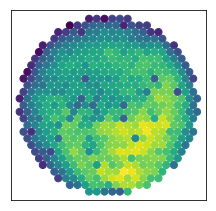

In [30]:
from muon.utils.camera import Camera
camera = Camera()

fig = plt.figure(figsize=(3.5,3.5))
x, y, c = camera.transform(cluster.mean_charge())
ax = fig.add_subplot(1,1,1, xticks=[], yticks=[])
ax.scatter(x, y, c=c, s=50, cmap='viridis')

plt.show()

Below is a visualization of the first 20 principal components. The structure of the components appears to change after the 7th, which suggests that the ones that follow can likely be attributed to noise.

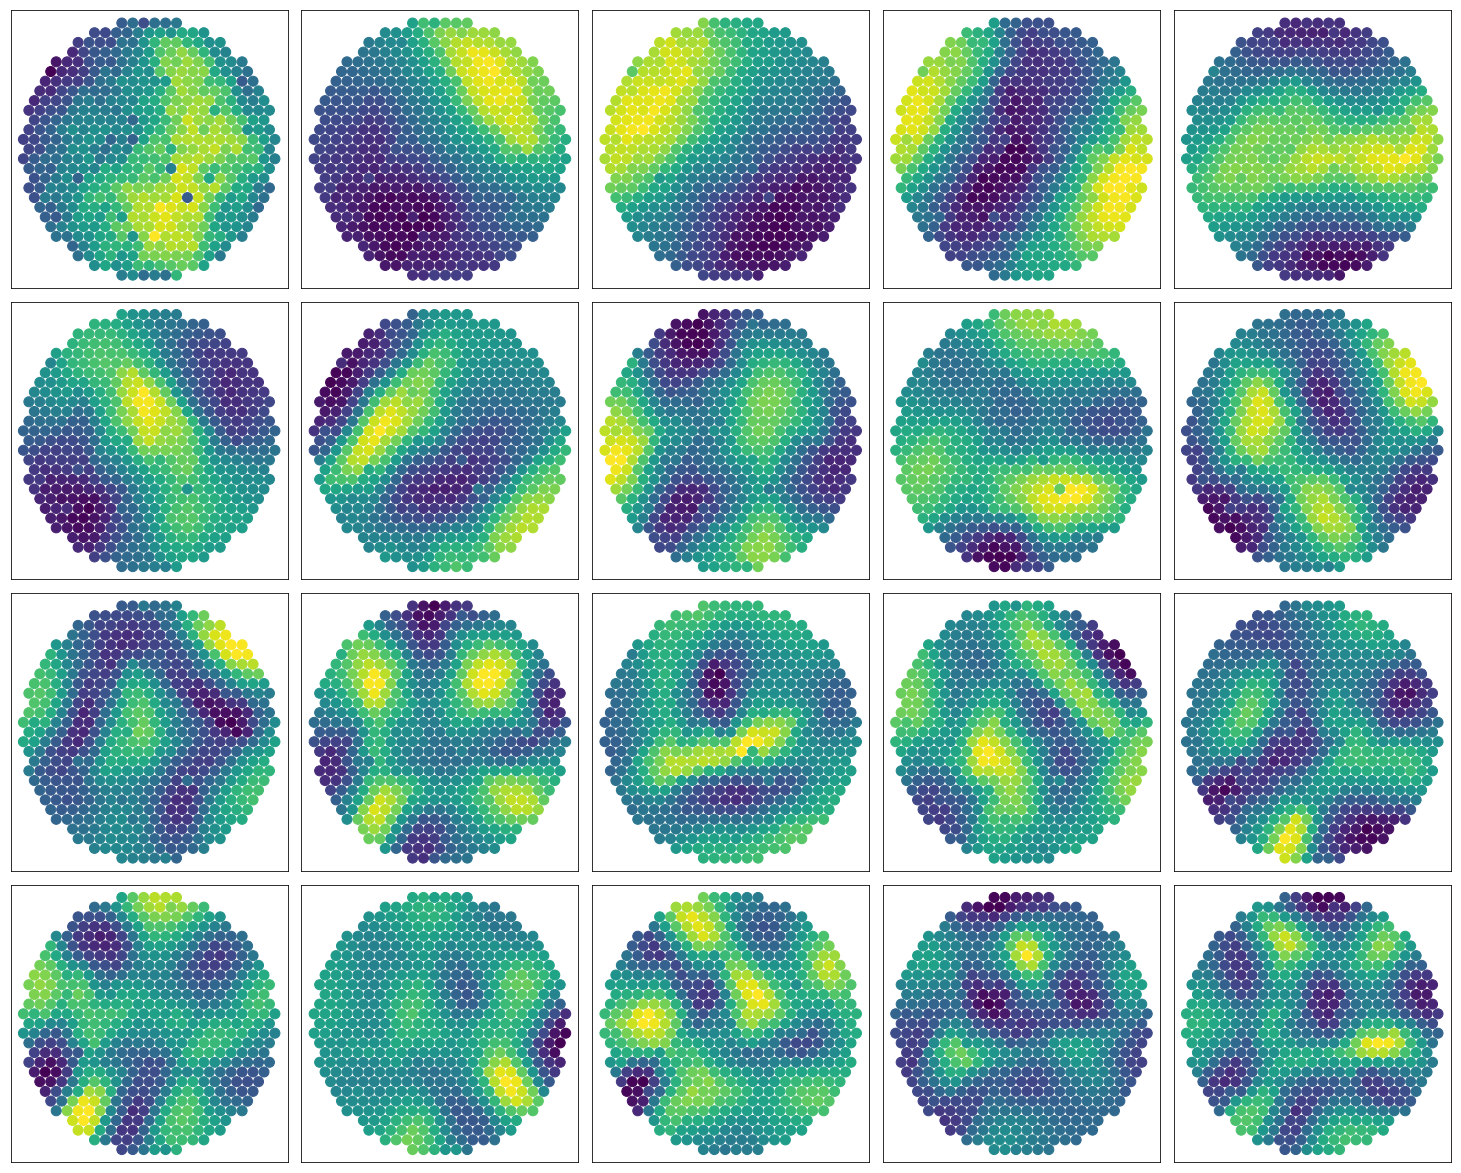

In [29]:
count = cluster.pca.n_components_
if count > 20:
    count = 20

w=5
l = math.ceil(count/w)

fig = plt.figure(figsize=(w*4, l*4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.05,
                    wspace=.05)

for n in range(count):
    component = cluster.pca.components_[n, :]
    x, y, c = camera.transform(component)
    ax = fig.add_subplot(l, w, n+1, xticks=[], yticks=[])
    ax.scatter(x, y, c=c, s=100, cmap='viridis')

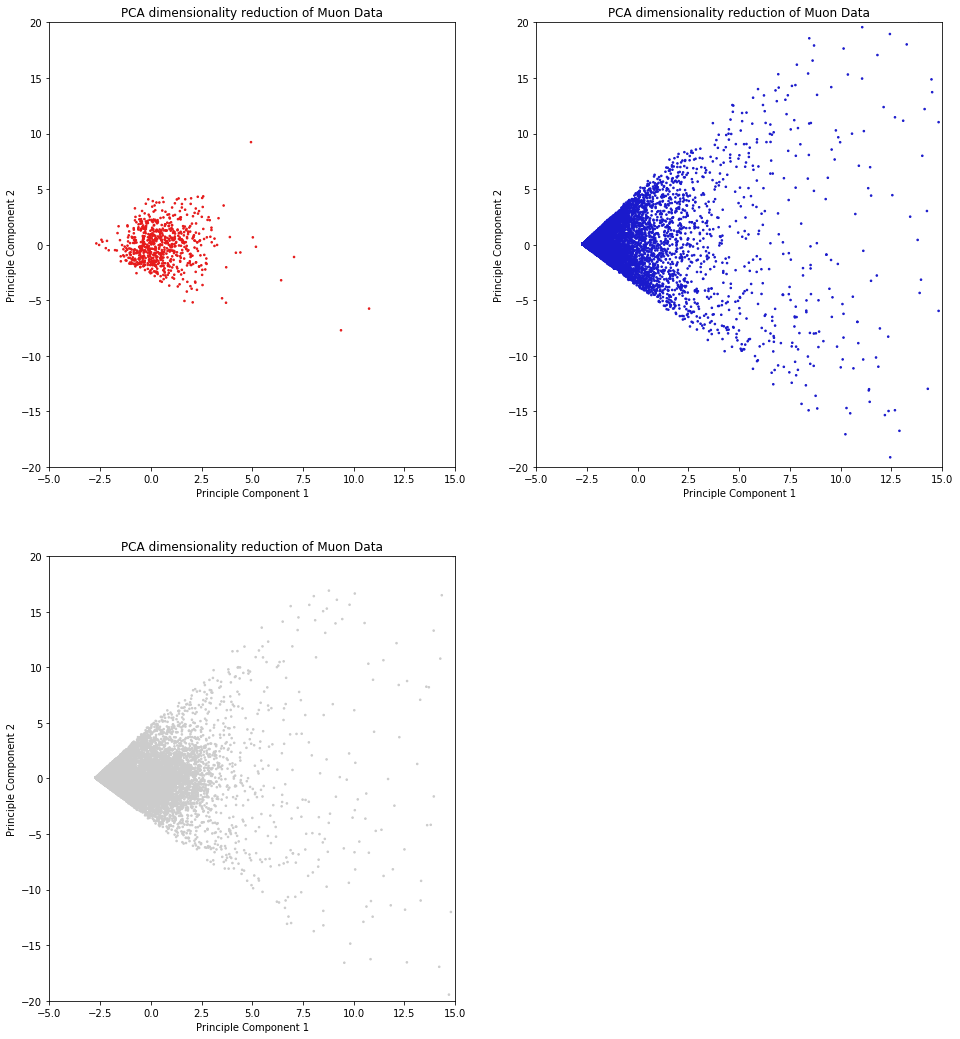

In [12]:
fig = plt.figure(figsize=(16, 18))
for i, s in enumerate((1, 0, -1)):
    cluster.plot_class(s, fig=fig, subplot=(2, 2, i+1), show=False)

plt.show()

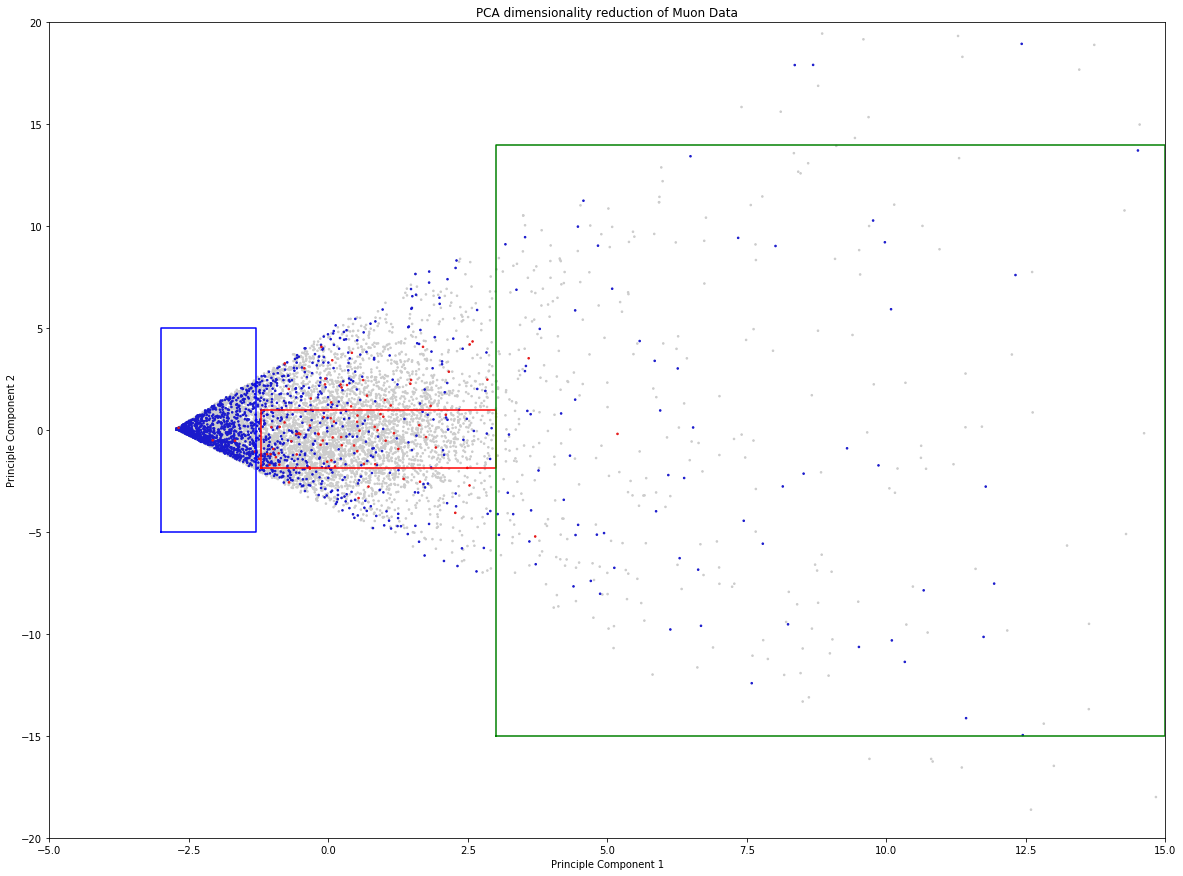

In [15]:
regions = [((-1.21084, 3.0, -1.87769, 1.00803))]
fig = plt.figure(figsize=(20,15))
_, ax = cluster.plot(fig=fig, subplot=(1, 1, 1), show=False)

def box(x, y, c):
    _x = [x[0], x[1], x[1], x[0], x[0]]
    _y = [y[0], y[0], y[1], y[1], y[0]]
    ax.plot(_x, _y, c=c)
    

box((-1.21084, 3.), (-1.87769, 1.00803), 'red')
box((-3, -1.3), (-5, 5), 'blue')
box((3, 15), (-15, 14), 'green')
plt.show()

The space comprised by first two principal components was divided into three rough regions as shown above. Subjects that are not labeled (grey dots) were sampled from these regions, and the subject images from Zooniverse are plotted below. The goal of this is to determine whether clustering seen by the red dots (real muons) is evident in the distribution of the unkown subjects.

The region bounded by the red box appears to be mostly comprised of ring-like events. The region bounded by the blue box appears to be mostly empty images, with some partial muons. The region bounded by the green box appears to be more noisy, containing ring-like shapes with additional noise, large noisy flares, as well as smaller groupings of lit pixels.

17512 100
100


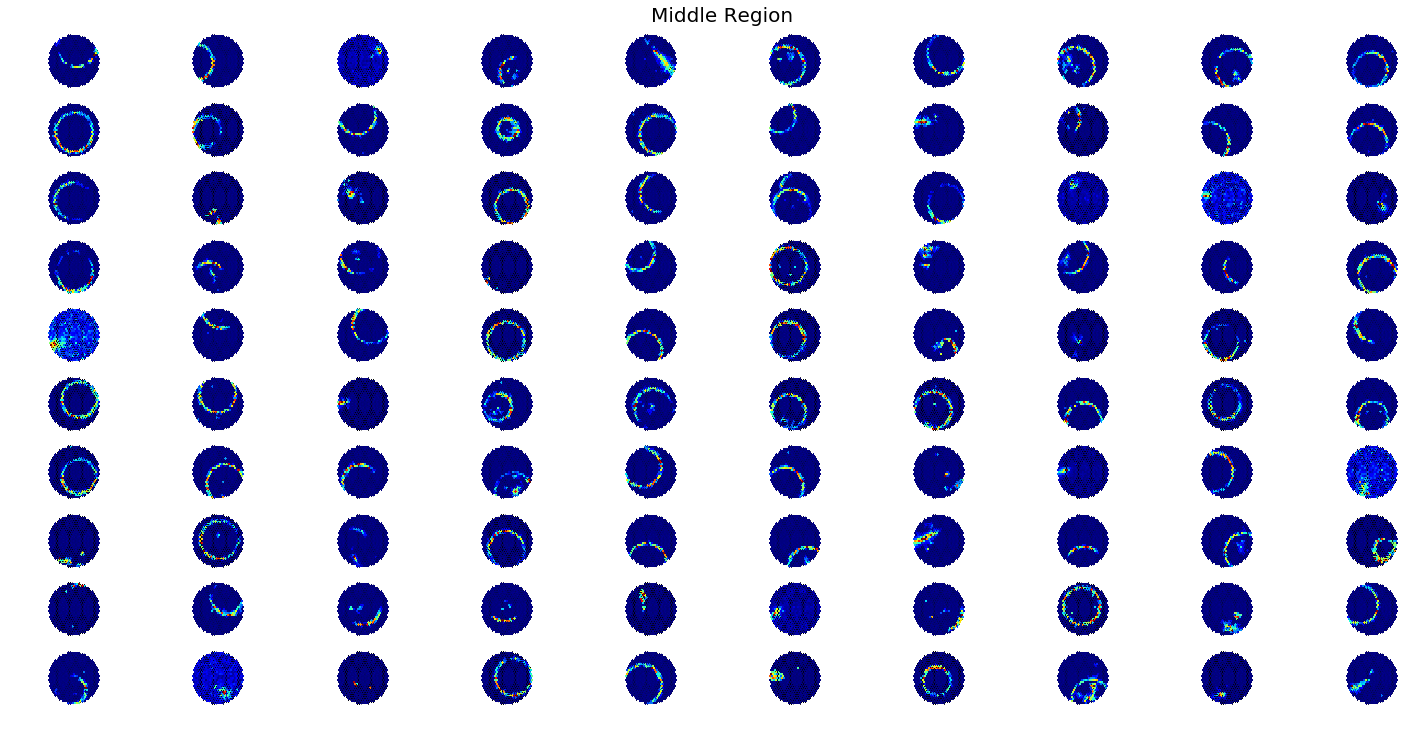

25617 100
100


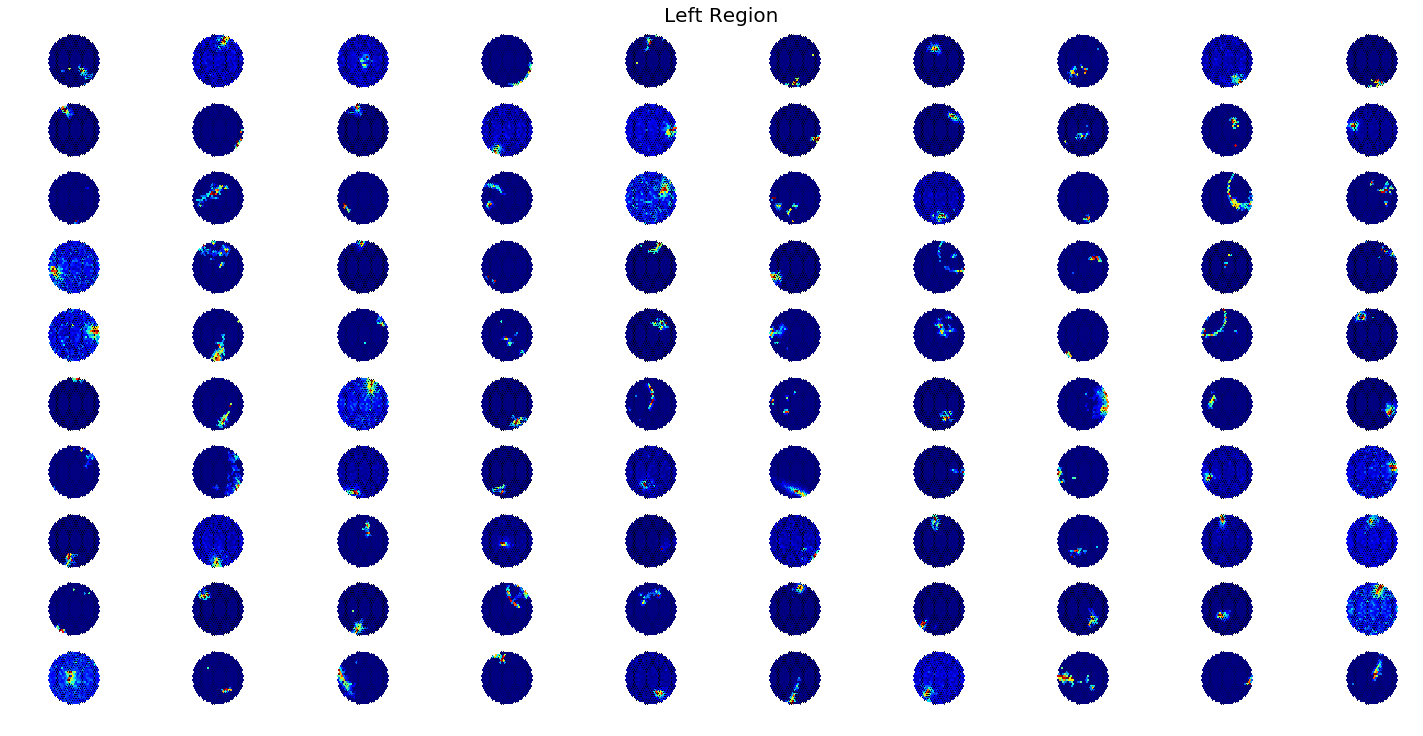

1961 100
100


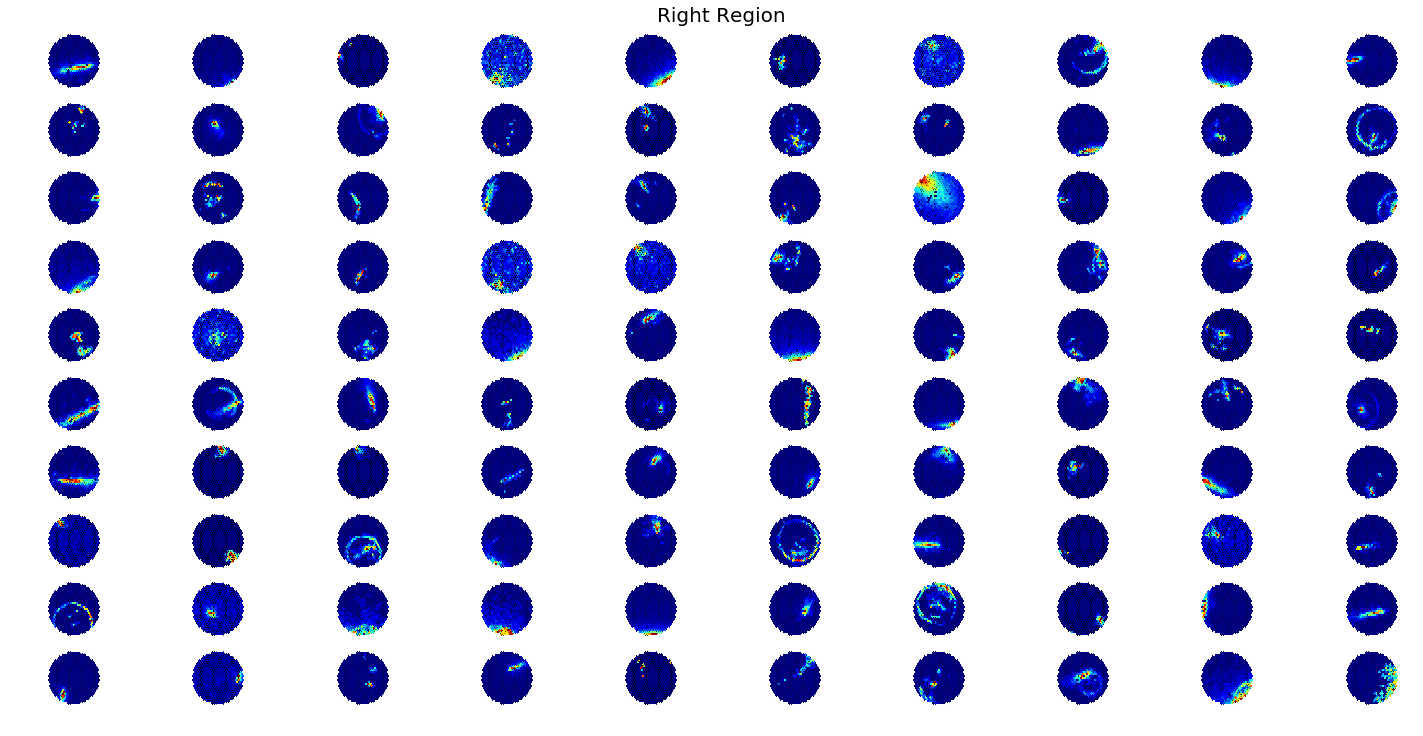

In [15]:
# Plotting montage of subjects in range
def download(cluster, x, y, c, size):
    subjects = cluster.subjects_in_range(x, y, c)
    return cluster.subject_images(subjects, size)
    
def montage(images, title):
    w = 10
    l = 10
    
    fig = plt.figure(figsize=(20,10))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=.95, hspace=.02, wspace=.01)
    for i, image in enumerate(images):
        ax = fig.add_subplot(l, w, i+1)
        ax.imshow(image)
        ax.axis('off')
    fig.suptitle(title, fontsize=20)
    plt.show()
    
images = download(cluster, (-1.21084, 3.0), (-1.87769, 1.00803), -1, 100)
montage(images, 'Middle Region')

images = download(cluster, (-20, -1.3), None, -1, 100)
montage(images, 'Left Region')

images = download(cluster, (5, 100), None, -1, 100)
montage(images, 'Right Region')
